# Classificação KNN

O objetivo desse documento e mostrar uma análise de um dataset simples e ao fim demonstrar a aplicação de um algorimto de classificação (KNN). Será escrito inteiramente em português para ajudar pessoas que não tem um inglês tão forte ainda. 

Irei explicar os imports, análises e gráficos.

O mais legal aqui é realizar as análises e destrinchar o dataset para podermos pensar em insights!

Vamos inicialmente importar algumas bibliotecas para análise e visualização de dados. 

Como o Git Hub não consegue renderizar gráficos dinâmicos - que nem os que o plotly gera - usaremos uma técnica para plotarmos os gráficos como imagens estéticas PNG.

Vamos lá.

In [1]:
import pandas as pd
import plotly.express as px

In [17]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00


Esse dataset inclui descrições de amostras hipotéticas de 23 espécies de cogumelos. Cada espécie é identificada como comestível (edible) ou venenosa (poisonous). Vamos realizar algumas análises e posteriormente desenvolver um modelo de classificação para descobrirmos se aquele cogumelo é comestível ou não.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/mushrooms.csv")

Vamos ver a descrição dos atributos (preferi deixar em inglês mesmo, mais fácil):

Attribute Information: (classes: edible=e, poisonous=p) - Objetivo (variável target)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Aparentemente tudo certo com a importação do dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Aparentemente sem dados faltantes.

Aqui teremos um problema: todas variáveis são categóricas e por conta disso teremos de convertê-las para numéricas. Poderíamos simplesmente trocar as letras do atributo cor (gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y), por exemplo, por valores numéricos (0, 1, 2, 3...). Infelizmente, isso atrapalharia o modelo. Isso ocorre porquê o modelo identificaria padrões inexistentes entre as cores. Para esclarecer, suponhamos que à cor preta seja atribuído o número 1 e à amarela o número 2. 2 é o dobro de 1, mas amarelo não é o dobro de preto. 
Em cenários como esse, a ferramenta ideal é o one-hot-enconding.
Observemos que caso houvesse uma relação matemática entre as variáveis, essa troca seria possível sem afetar a acuracidade do modelo. Caso houvesse um atributo sabor com "Muito bom", "Bom", "Ruim" e "Péssimo", dependendo das escolhas dos valores realizar essa troca não afetaria tanto as análises (uma vez que "Muito bom" é "melhor/maior" que as outras variáveis.)

Para que possamos realizar algumas análises explorátórias, entretanto, vou converter os valores em numéricos para que as plotagens fiquem mais fáceis. Para isso vou criar outro dataset e trabalhar com o original apenas na hora de desenvolver o modelo.

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.value_counts()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat
e      b          f            g          f        n     f                w             b          g           e            ?           k                         k                         w                       w                       p          w           t            p          w                  n           g          1
p      f          y            g          f        f     f                c             b          p           e            b           k                         k                         p                       n                       p          w           o            l          h                  v           d          1
                        

Não ficou nada claro o value_counts(). Esse comando é muito útil e funciona como o comando unique() e nunique().

O value_counts() traz a o número de aparições de uma informação. Para ser mais claro, vamos ver um exemplo da feature "cap-shape" - formato da cabeça do cogumelo.

Sabemos que temos 6 possibilidades: 

- bell=b
- conical=c
- convex=x
- flat=f
- knobbed=k
- sunken=s

Agora, para sabermos quantos cogumelos cuja o formato da cabeça é "bell", "conical", "convex" e assim por diante, usamos o value_counts(). 

Veja só:

In [6]:
df['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

Muito mais claro. Dois mais de 8000 cogumelos no dataset, sabemos agora que 3656 têm o formato da cabeça convexo (x). 

Ajuda bastante.

Apenas para conhecimento, vejamos os comandos unique() e nunique():

In [7]:
df['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [8]:
df['cap-shape'].nunique()

6

Como podemos ver, o comando unique() traz todas as possibilidades de valores para aquela feature. É muito útil quando não temos essa informação.

Já comando nunique() traz essa mesma informação quantitativamente, ou seja, sabemos que existem 6 possibilidades de resposta na feature cap-shape, mas não sabemos quais são elas.

O value_counts() une essas duas informações e ainda complementa-a.

A seguir, usaremos o describe. 

Ele funciona muito melhor para variáveis numéricas, mas como todas nossas variáveis são categóricas, esse comando traz menos informações.

Nesse caso, ele trouxe a contagem de cada feature (quantos dados/linhas tem cada feature/coluna), quantos valores diferentes têm cada feature (unique), o valor de maior frequência (top) e freq é a frequência desse maior valor.

Para dados numéricos, o índice do resultado incluirá ainda a média, desvio padrão, mínimo, máximo, bem como percentis inferior, 50 e superior. Por padrão, o percentil inferior é 25% e o percentil superior é 75%. O percentil 50% é igual à mediana.

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df['habitat'].value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

Aqui, vamos substituir as letras por números para que possamos plotar os gráficos de maneira mais simples, mas lembremos que para criação do modelo, deveremos usar o one-hot-encoding que isso que estamos fazendo pode afetar o comportamento do modelo!

In [4]:
change = {"class":     {"e": 0, "p": 1},
                "cap-shape": {"x": 0, "f": 1, "k": 2, "b": 3, "s": 4, "c": 5},
                "cap-surface": {"y": 0, "s": 1, "f": 2, "g": 3},
                "cap-color": {"n": 0, "g": 1, "e": 2, "y": 3, "w": 4, "b": 5, "p": 6, "c": 7, "u": 8, "r": 9},
                "bruises": {"f": 0, "t": 1},
                "odor": {"n": 0, "f": 1, "y": 2, "s": 3, "a": 4, "l": 5, "p": 6, "c": 7, "m": 8},
                "gill-attachment": {"f": 0, "a": 1},
                "gill-spacing": {"c": 0, "w": 1},
                "gill-size": {"b": 0, "n": 1},
                "gill-color": {"b": 0, "p": 1, "w": 2, "n": 3, "g": 4, "h": 5, "u": 6, "k": 7, "e": 8, "y": 9, "o": 10, "r": 11},
                "stalk-shape": {"t": 0, "e": 1},
                "stalk-root": {"b": 0, "?": 1, "e": 2, "c": 3, "r": 4},
                "stalk-surface-above-ring": {"s": 0, "k": 1, "f": 2, "y": 3},
                "stalk-surface-below-ring": {"s": 0, "k": 1, "f": 2, "y": 3},
                "stalk-color-above-ring": {"w": 0, "p": 1, "g": 2, "n": 3, "b": 4, "o": 5, "e": 6, "c": 7, "y": 8},
                "stalk-color-below-ring": {"w": 0, "p": 1, "g": 2, "n": 3, "b": 4, "o": 5, "e": 6, "c": 7, "y": 8},
                "veil-type": {"p": 0},
                "veil-color": {"w": 0, "n": 1, "o": 2, "y": 3},
                "ring-number": {"o": 0, "t": 1, "n": 2},
                "ring-type": {"p": 0, "e": 1, "l": 2, "f": 3, "n": 4},
                "spore-print-color": {"w": 0, "n": 1, "k": 2, "h": 3, "r": 4, "u": 5, "o": 6, "y": 7, "b": 8},
                "population": {"v": 0, "y": 1, "s": 2, "n": 3, "a": 4, "c": 5},
                "habitat": {"d": 0, "g": 1, "p": 2, "l": 3, "u": 4, "m": 5, "w": 6}
                }      

Vamos criar um novo df igual ao original para mudarmos para numérico:

In [5]:
df_analise = df

In [6]:
df_analise = df_analise.replace(change)
df_analise.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,...,0,0,0,0,0,0,0,2,2,4
1,0,0,1,3,1,4,0,0,0,7,...,0,0,0,0,0,0,0,1,3,1
2,0,3,1,4,1,5,0,0,0,3,...,0,0,0,0,0,0,0,1,3,5
3,1,0,0,4,1,6,0,0,1,3,...,0,0,0,0,0,0,0,2,2,4
4,0,0,1,1,0,0,0,1,0,7,...,0,0,0,0,0,0,1,1,4,1


Deu certinho, o negócio agora é lembrar que que é cada número.

In [15]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

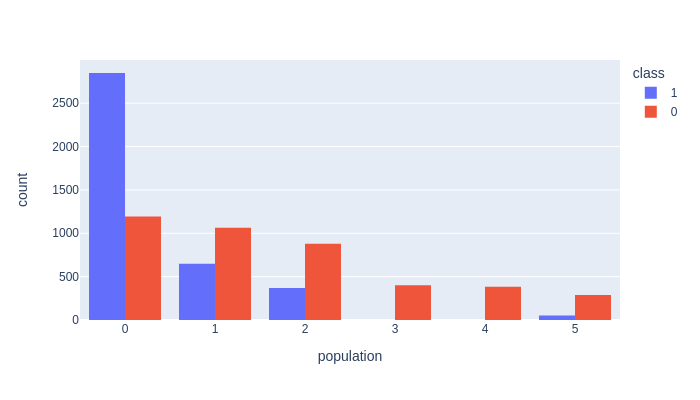

In [7]:
fig = px.histogram(df_analise, x="population", y="class", color="class",
            barmode='group', histfunc='count', 
             height=400)
fig.show(renderer="png")

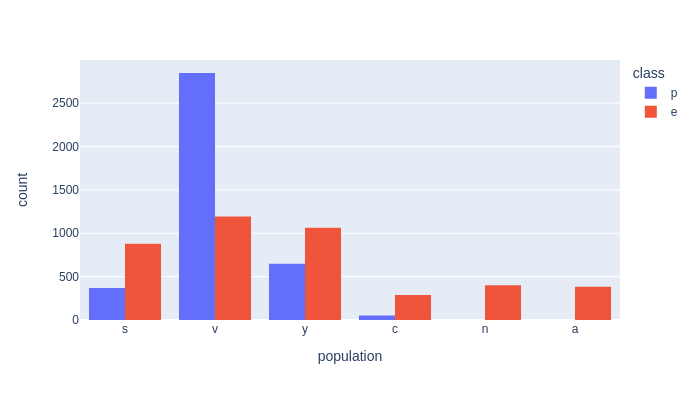

In [13]:
fig = px.histogram(df, x="population", y="class", color="class",
            barmode='group', histfunc='count', 
             height=400)
fig.show(renderer="png")
#fig.show()

Acho que não precisava ter passado as informações para valores numéricos para plotar os gráficos, então plotar com as letras e se der problema, uso o df_analise que tem os números. 

Apenas para lembrar:

poisonous: p, edible: e
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

Com o gráfico acima podemos observar que dentre os cogumelos, os que tendem a ser venenosos são os que apresentam população v, several. Com relação a todas as outras população, a chance do cogumelo ser comestível é maior, mas não vale o risco. Populações numerous (n) e abundant (a) não tem cogumelos venenosos. 

Cogumelos s, scattered, tem 29.49% de chance de ser venenosos. Dos 1248 exemplares, 368 são venenosos e o resto comestível. Quando usamos o ploty sem mudar o formato, podemos ver esses valores apenas ao colocar o mouse em cime da imagem.

Com relação a cogumelos de população y, solitary, sabemos que a chance de um cogumelo dessa população ser venenoso é de 37.85%.


Aqui estamos comparando dentro das populações de cogumelo a chance daquele ser comestível ou venenoso com um gráfico de barras.

Vamos ver em relação ao habitat:

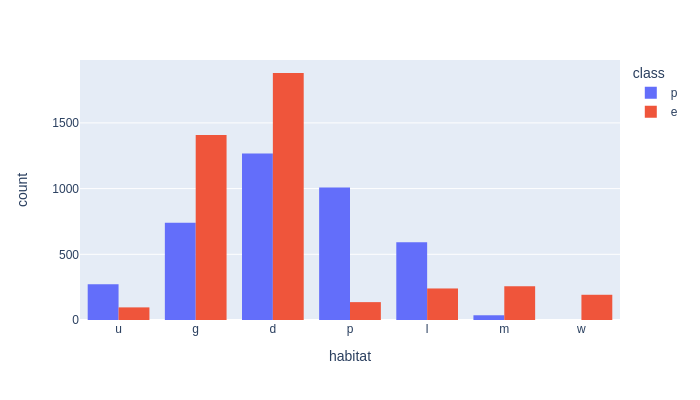

In [10]:
fig = px.histogram(df, x="habitat", y="class", color="class",
            barmode='group', histfunc='count',
             height=400)
fig.show(renderer="png")

Colinha:

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Com relação ao habitat dos cogumelos, observamos que os venenosos se encontram principalmente em florestas (woods), caminhos (paths) e jardins (grasses). Ainda assim, a probabilidade de um cogumelo nessas áreas ser comestível é maior, com exceção de "caminhos", que a grande maioria dos cogumelos é venenosa.

Nos lixos (w), não crescem cogumelos nocivos à saúde.

Não existem cogumelos venenosos em lixões (waste).

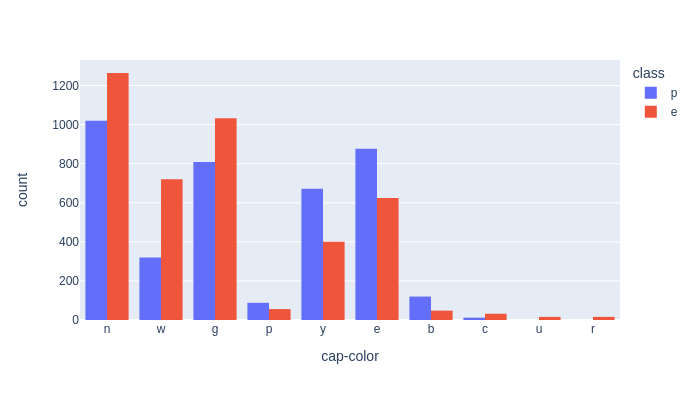

In [14]:
fig = px.histogram(df, x="cap-color", y="class", color="class",
            barmode='group', histfunc='count',
             height=400)
fig.show(renderer="png")

Para nos ajudar:

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

Quando analisamos as cores da cabeça dos cogumelos, podemos obervar que se um cogumelo é vermelho (e), as chances dele ser venenoso é mais alta da chance dele ser comestível. O mesmo vale para cogumelos de cor amarelos (y), amarelados (b) e rosas (p). 

Em compensação, cogumelos roxos (u) e verdes (r) são sempre comestíveis e cogumelos marrons (n), brancos (w), cinzas (g) e canela (c) tem mais exemplares comestíveis do que não, mas acho que não vale o risco também. Ou seja, na prática, se encontrar um cogumelo marrom e não souber se come ou não, terá de olhar outras características físicas do cogumelo para definir (como sua população e habitat por exemplo). Assim, como sabemos que não crescem cogumelos venenosos em lixos, se o cogumelo marrom estiver crescendo no lixo, ele será comestível.

Assim que começamos a usar das análises passadas e já feitas para ir ligando os pontinhos.

Vamos agora ver quanto ao cheiro:

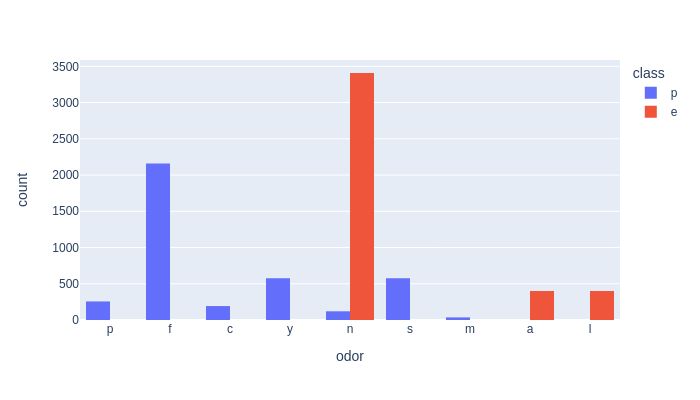

In [15]:
fig = px.histogram(df, x="odor", y="class", color="class",
            barmode='group', histfunc='count',
             height=400)
fig.show(renderer="png")

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

Ao analisarmos o cheiro (odor) de cogumelos, comparando venenosos e comestíveis, podemos perceber que cogumelos sem cheiro algum geralmente são comestíveis, mas há exceções. Além disso, cogumelos com odor "almond" e "anise" sempre serão comestíveis. 

O que se pode entender desse gráfico, de forma simplificada, é que qualquer cogumelo que apresente cheiro, por via das dúvidas, é melhor não ingerir. Isso porquê cogumelos com cheiro "creosote", "fishy", "foul", "musty" ou "pungent" são sempre venenosos.


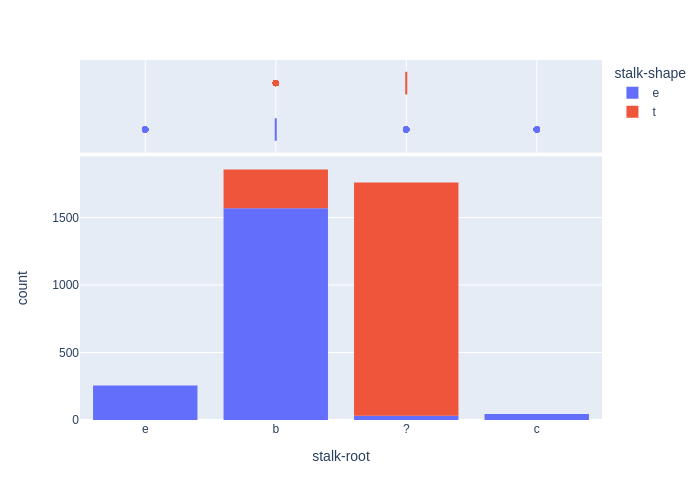

In [24]:
fig = px.histogram(df.query("`class`== 'p'"), x="stalk-root", y="class", color="stalk-shape",
                   marginal="box",  histfunc='count',
                   hover_data=df.columns)
fig.show(renderer="png")
#fig.show()

Esse gráfico de distribuição parece complexo a primeira vista, mas vamos entendê-lo:

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

No eixo X temos o atributo "stalk-root", a forma da raiz, podendo assumir os valores e (equal), ? (sem informação a respeito - missing), b (bulbous), c (club) e z (rhizomorphs).
No eixo Y temos a contagem da classe, ou seja, quantos exemplares com aquela característica temos. 

Por fim temos a diferenciação entre cores usando o atributo "stalk-shape", que é a forma do talo, que pode assumir t (tapering) ou e (enlarging).

Dessa forma, como estamos plotando apenas cogumelos venenosos, observamos que as duas principais combinações de talo e raiz para que um cogumelo seja venenoso são formato "enlarging" e raiz "bulbous" e formato "tapering" (1) e qualquer raiz (não há informação). 

Não foram conclusões muito iluminadoras. 

Vamos seguir.

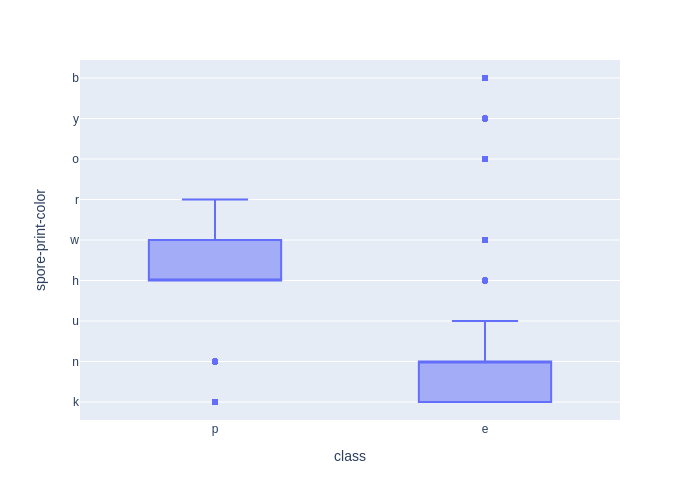

In [28]:
fig = px.box(df, x="class", y="spore-print-color")
fig.show(renderer="png")
#fig.show()

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

Esse gráfico já ajuda mais. Com esse boxplot observamos que cogumelos comestíveis apresentam maior variação nas cores dos esporos (spore-print-color)e costumam ter esporos marrons (n) e pretos (k). 

Já cogumelos venenosos.], costumam ter seus esporos cor de chocolate e brancos, mas podendo ter outras cores também.

O que dá para dar de certeza é que se um cogumelo tem seus esporos cor roxa, laranja, amarela ou amarelada ele com certeza é comestível. Em compensação, se a cor é verde, é com certeza venenoso.

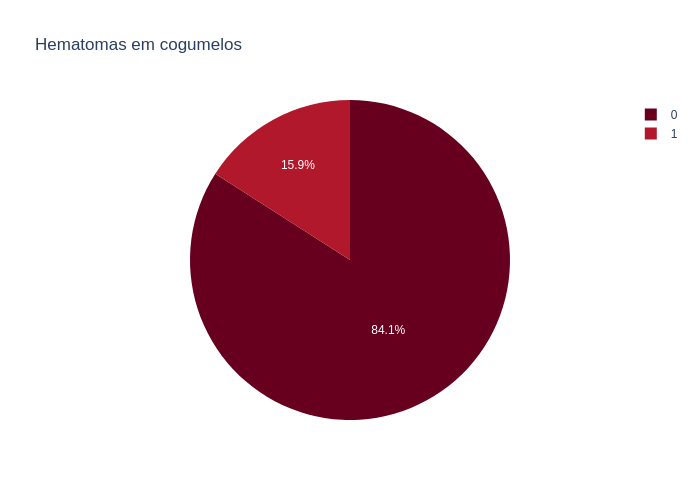

In [31]:
import plotly.express as px
fig = px.pie(df_analise, values='class', names='bruises', title='Hematomas em cogumelos', 
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show(renderer="png")

Aqui, os números se fizeram úteis e podemos observar que a maioria dos cogumelos comestíveis apresentam hematomas (machucados), enquanto que cogumelos mais conservados costumam ser venenosos. 
Interessante.

Bom, realizamos diversas análises e já podemos observar que cogumelos venenosos costumam ter características pecualiares. Vamos obervar quais seriam os atributos mais impactantes para essa decisão.

Para isso, vamos realizar o one-hot-enconding no dataset original (criando um novo) e observar a correlação.

In [32]:
df['class'].replace({"p": 1, "e": 0}, inplace=True)

In [33]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


A função get_dummies() converte todas as variáveis categóricas para numéricas - ela faz o one-hot-enconding.

In [34]:
df_model = pd.get_dummies(df)

In [35]:
df_model.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


Observemos que agora temos 118 colunas e que cada coluna é sua feature mais seu valor:

cap-shape_b, cap-shape_c, cap-shape_f...

Vamos ver a correlação de cada variável com o fato de ser venenoso ou não. Para isso por padrão usaremos o comando corr() que usa a correlação de Pearson (padrão).

In [36]:
cor = df_model.corr()
cor

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class,1.000000,-0.182567,0.023007,0.018526,0.163565,-0.060664,-0.026886,-0.195415,0.023007,0.095454,...,-0.159572,0.443722,-0.107055,-0.126123,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087
cap-shape_b,-0.182567,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,...,0.158702,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764
cap-shape_c,0.023007,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,...,-0.009456,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
cap-shape_f,0.018526,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,...,-0.075804,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450
cap-shape_k,0.163565,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,...,-0.089360,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_l,0.155150,0.010113,0.065707,-0.052326,0.235108,-0.021242,-0.096639,-0.191987,0.065707,0.190799,...,-0.143906,0.248675,-0.174539,-0.268668,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553
habitat_m,-0.138627,0.374316,-0.004286,-0.129312,-0.065047,-0.012142,-0.004529,-0.122077,-0.004286,0.077081,...,0.152473,-0.144434,-0.099772,-0.153579,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041
habitat_p,0.323346,-0.095178,-0.008985,0.021891,0.090538,-0.025458,-0.029042,-0.086727,-0.008985,-0.039574,...,-0.125366,0.169228,0.040714,-0.322005,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986
habitat_u,0.112078,-0.052871,-0.004835,0.030636,-0.073380,0.288697,0.002845,-0.011913,-0.004835,0.117548,...,0.130450,0.001180,-0.042888,-0.173254,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889


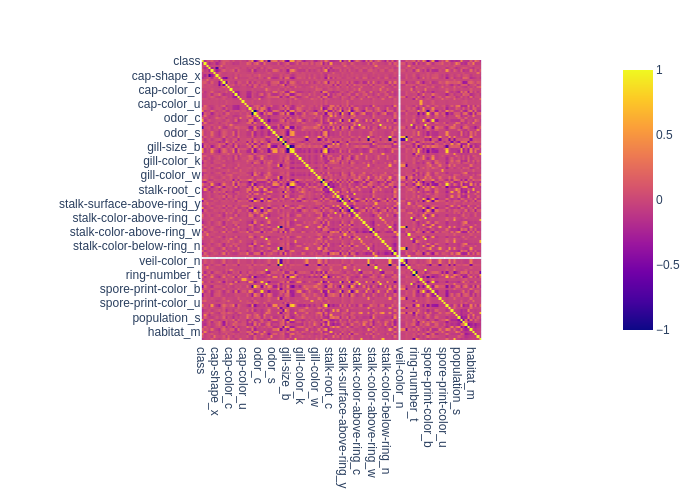

In [37]:
fig = px.imshow(cor)
fig.show(renderer="png")

Não ficou visual nosos mapa de calor, tem muita variável. Vamos ver quem tem correlação maior ou menor que 0.2

In [ ]:
cor2 = abs(cor["class"])
relevant_features = cor2[cor2>0.2]
relevant_features

class                         1.000000
bruises_f                     0.501530
bruises_t                     0.501530
odor_a                        0.219529
odor_f                        0.623842
odor_l                        0.219529
odor_n                        0.785557
odor_s                        0.286360
odor_y                        0.286360
gill-spacing_c                0.348387
gill-spacing_w                0.348387
gill-size_b                   0.540024
gill-size_n                   0.540024
gill-color_b                  0.538808
gill-color_n                  0.288943
gill-color_w                  0.231316
stalk-root_?                  0.302001
stalk-root_c                  0.218548
stalk-root_e                  0.202839
stalk-surface-above-ring_k    0.587658
stalk-surface-above-ring_s    0.491314
stalk-surface-below-ring_k    0.573524
stalk-surface-below-ring_s    0.425444
stalk-color-above-ring_b      0.245662
stalk-color-above-ring_g      0.266489
stalk-color-above-ring_n 

Tem bastante. Vamos ver maior que 0.5.

In [ ]:
cor3 = abs(cor["class"])
relevant_features = cor3[cor3>0.5]
relevant_features

class                         1.000000
bruises_f                     0.501530
bruises_t                     0.501530
odor_f                        0.623842
odor_n                        0.785557
gill-size_b                   0.540024
gill-size_n                   0.540024
gill-color_b                  0.538808
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                   0.540469
Name: class, dtype: float64

Perfeito. 

Essas são as variáveis que mais impactam se o cogumelo é venenoso ou não.

Legal falar que correlação e causalidade são coisas diferentes ein! Ou seja, a correlação nos diz a força e direção do relacionamento entre variáveis, mas nada esclarece sobre os motivos desse relacionamento. Já os estudos sobre causalidade conseguem dar um passo além, indicando que a mudança em uma variável causará uma mudança em outra.

Por exemplo, ao lidar com dados do Censo Escolar, imagine que você descubra uma correlação forte entre a ausência de esgoto nas escolas e a nota do Enem.

Poderíamos dizer que “Se a escola tem esgoto, a nota do Enem é em média X pontos mais alta”. Agora, isso não quer dizer que basta instalar coleta de esgoto nas escolas para as notas aumentarem prontamente. Dessa maneira, esgoto e notas no enem apresentam uma correlação, mas uma não necessariamente é causadora da outra. As duas coisas podem até estarem correlacionadas, mas estabelecer causalidade entre ambas é algo bem mais complexo. De fato, as escolas que não possuem esgoto possuem notas mais baixas, mas existem outros fatores (sociais, econômicos, etc) que impactam tanto a performance dos alunos, quanto a presença ou não de esgoto nas escolas.

Vamos ao modelo.

In [38]:
X = df_model.drop("class", axis=1)
Y = df_model["class"]
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X,
  Y,
  test_size = 0.3,
  random_state=42
)

Vamos separar 30% para teste e eliminar o fator randômico de nossa modelagem. para isso setamos a variável random_state=42, assim, se rodarmos várias vezes o modelo, sempre vamos utilizar o mesmo conjunto de teste e de treino.  

Normalmente teríamos de ajeitar a ordem de grandeza dos atributos (normalizar os dados), mas como todos são binários (one-hot-encoding), não vamos precisar.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

O número de vizinhos por padrão é 5. Vamos com os valores padrão mesmo.

In [41]:
y_pred = knn.predict(X_test)

Vamos a matrix de confusão:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



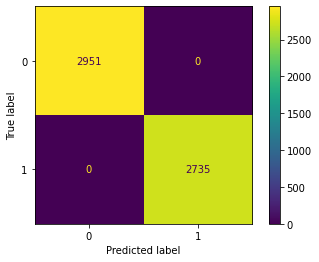

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

plot_confusion_matrix(knn, X_train, y_train)

O modelo foi perfeito. Não errou nenhum.

O primeiro quadrante traduz casos em que o modelo previu 0 (comestível) e acertou e o segundo quadrante seria o caso do modelo ter previsto comestível e na verdade não ser. Observemos que seu valor é 0.

No terceiro quadrante, o modelo previu corretamente também tudo, ou seja, o modelo não previu nenhum valor venenosos como comestível e o quarto quadrante comprova que todos cogumelos venenosos foram "previdos" de forma correta.

Vamos a alguns indicadores válidos para modelos de classificação. É importante testarmos o modelo com os dados de teste, para caso de ter ocorrido um "overfitting", quando o modelo se adequa perfeitamente aos dados de treino, mas performa mal com dados externos.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



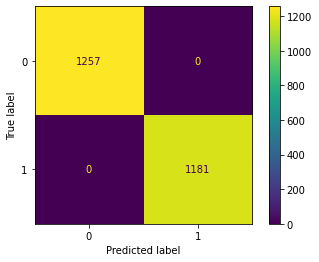

In [43]:
plot_confusion_matrix(knn, X_test, y_test)

No teste performou de forma perfeita também. Era de se esperar um modelo com alta precisão, umas vez que os dados são binários e há altos valores de correlação. Além disso, o dataset é pequeno e ajustado.


Vamos aos indicadores:


VP: Primeiro quadrante (verdadeiros positivos)
FP: Segundo quadrante (falsos positivos)
FN: Terceiro quadrante (Falsos negativos)
VN: Quarto quadrante (Verdadeiros negativos)

Precisão = VP / (VP + FP)

Sensitividade = VP / (VP + FN) = Recall

Especificidade = VN / (VN + FP)

F1 = 2 x Precisão x Recall / Precisão + Recall


Legal salientar que dependendo do caso, cada indicador tem um peso diferente e é por isso que a especificidade e o recall levam em consideração falsos positivos e negativos. Se estivéssemos prevendo, por exemplo, a taxa de sucesso do teste de COVID-19, um valor alto para falso negativo (FN) é muito mais prejudicial do que um falso positivo (FP), porque, na prática, uma pessoa com infectada poderia circular livremente ao invés de ficar em isolamento enquanto que uma pessoa não infectada, mas que o exame deu positivo, iria apenas ficar de quarentena sem necessidade.


No nosso caso, é preferível ter um valor baixo em falsos negativos, uma vez que mesmo que o cogumelo seja comestível e o modelo indicar que não é, é menos nocivo do que o cogumelo ser venenoso e o modelo apontar que não.

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

[[1257    0]
 [   0 1181]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Como está tudo 1, está tudo perfeito como comprova a matrix.

A coluna support mostra o total, ou seja, tem 1257 elementos na primeira classe (que pode ser venenoso ou comestível) e ele acertou todos.

Como extra, vamos fazer um teste e ver qual o número ideal de vizinhos ( de 1 a 50) e vamos observar isso graficamente:

In [45]:
precision = []

for k in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  prec_i = precision_score(y_test, pred_i, average='micro')
  precision.append(prec_i)

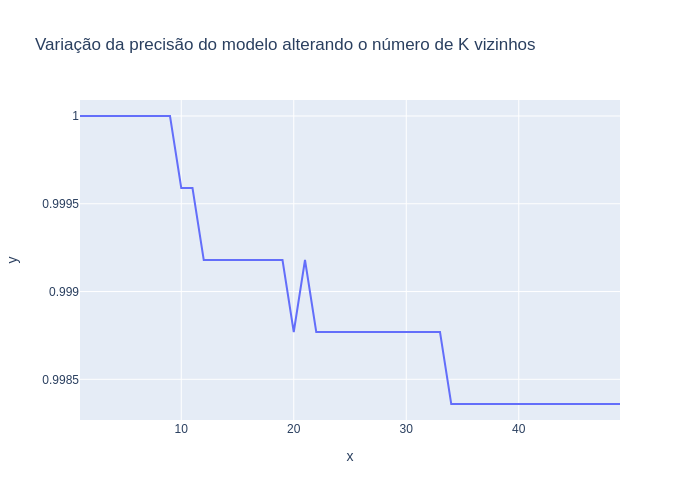

In [47]:
df3 = pd.DataFrame(dict(
    x = range(1, 50),
    y = precision))

fig = px.line(df3, x="x", y="y", title='Variação da precisão do modelo alterando o número de K vizinhos')
fig.show(renderer="png")

O modelo é tão ajustado que até 9 vizinhos a acuracidade é de 100%. Conforme vamos aumentando o  número de vizinhos, vai piorando, mas ainda assim fica acima de 99%.